## Public sentiment analysis on Distance-Based Transport Fare Model

## Scope: Rwanda

This notebook presents a complete analysis of public sentiment concerning Rwanda's new distance-based transport fare system.

## Objectives

- Identify sentiments/reaction from citizens over the new fare system
- Explore ways to extract, process, and analyze public sentiment from various data sources
- Derive Insights to inform policymakers

## Dataset overview
The data was collected from social media posts, comments, and newspapers expresssing their sentiment over the new distance-based fare system in Rwanda between 5-feb-2019 and 21-march-2025

**Modules used:**
- `data_cleaning.py`
- `keywords_detection.py`
- `sentiment.py`
- `sentiment_analysis.py`
- `MLsentimentPrediction.py`
- `visualization.py`

## Be aware of the file's path (change it to your own convinience)


## Data cleaning and preprocessing

The dataset is cleaned by removing duplicates, convert to lowercase, reading special characters, and stop words.
Ready for analysis.

In [1]:
from data_cleaning import load_and_clean
from sentiment import apply_sentiment_analysis


file= r'C:\Users\USER\Downloads\Documents\Data Analytics Projects\Distance-based Fare\Data Collection.csv'

cleaned_file= load_and_clean(file)
cleaned_file = apply_sentiment_analysis(cleaned_file, text_column='sentiment')


Successfully loading and cleaning.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         16 non-null     datetime64[ns]
 1   platform     16 non-null     object        
 2   sources/url  16 non-null     object        
 3   comment      16 non-null     object        
 4   sentiment    16 non-null     object        
dtypes: datetime64[ns](1), object(4)
memory usage: 772.0+ bytes
None


## Sentiment Distribution
The following codes call the function to plot the graph representing the sentiments from comments made by citizens.

2025-05-18 19:47:12.152 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-18 19:47:12.399 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-18 19:47:13.382 
  command:

    streamlit run C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-18 19:47:13.382 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


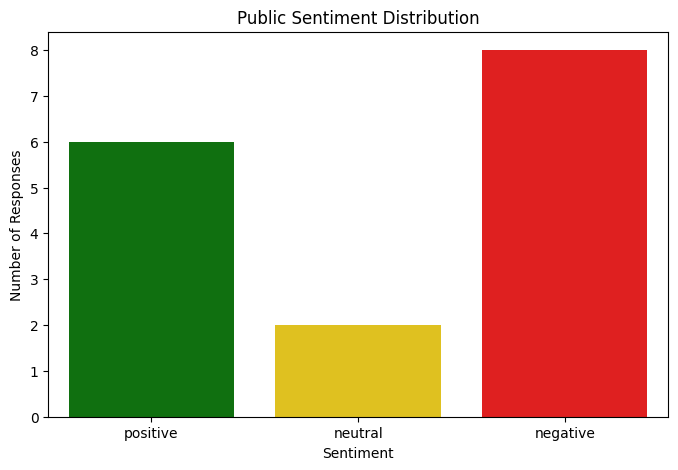

In [2]:
#Visualization for the sentiment distribution
import pandas as pd
cleaned_file = pd.read_csv(r'C:\Users\USER\Downloads\Documents\Data Analytics Projects\Distance-based Fare\cleaned_file.csv')
from sentiment_distribution import plot_sentiment
%matplotlib inline
plot_sentiment(cleaned_file)

## Keyword Detection
The following codes call functions to extract, count, and plot keyword distribution


In [3]:
from keywords_detection import extract_keywords, keyword_dictionary

#apply extraction on each row
cleaned_file['keywords'] = cleaned_file['comment'].apply(lambda x: extract_keywords(x, keyword_dictionary))
#save file to csv for dashboard
cleaned_file.to_csv(r'C:\Users\USER\Downloads\Documents\Data Analytics Projects\Distance-based Fare\cleaned_file.csv', index= False)

2025-05-18 19:47:13.871 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-18 19:47:14.588 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-18 19:47:14.588 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


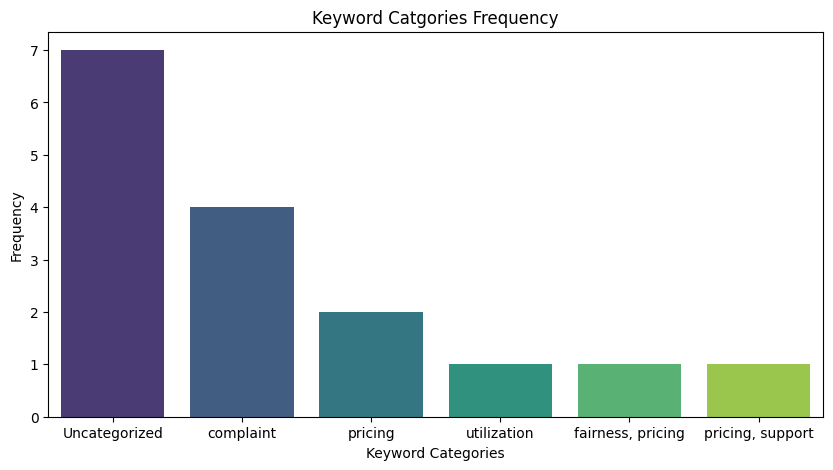

In [4]:
from keywords_detection import detect_keywords_in_comment, keyword_counts, keyword_counts_graph
%matplotlib inline

cleaned_file = detect_keywords_in_comment(cleaned_file, text_column='comment')

counts = keyword_counts(cleaned_file, none_label= "Uncategorized")
keyword_distribution = keyword_counts_graph(counts)

2025-05-18 19:47:15.200 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-18 19:47:15.747 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-18 19:47:15.747 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


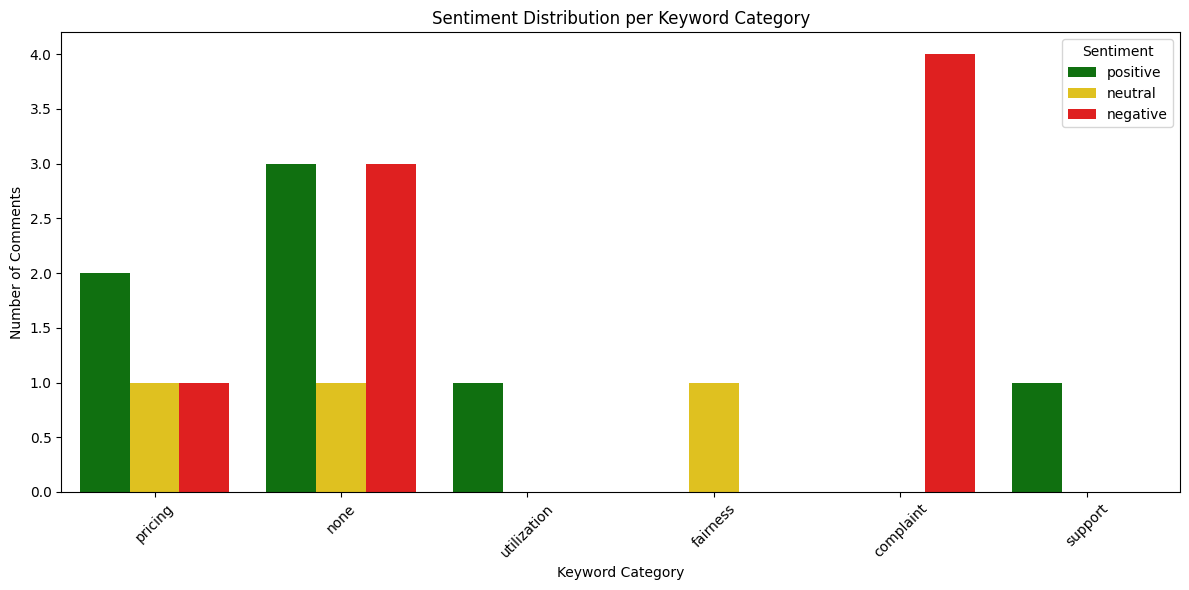

In [5]:
# Split multiple keywords into separate rows
import matplotlib.pyplot as plt
df_exploded = cleaned_file.copy()
df_exploded['keywords'] = df_exploded['keywords'].str.split(', ')
df_exploded = df_exploded.explode('keywords')
%matplotlib inline

from keywords_detection import plot_keyword_sentiment_distribution
plot_keyword_sentiment_distribution(df_exploded)

2025-05-18 19:47:16.094 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-18 19:47:16.755 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-18 19:47:16.755 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


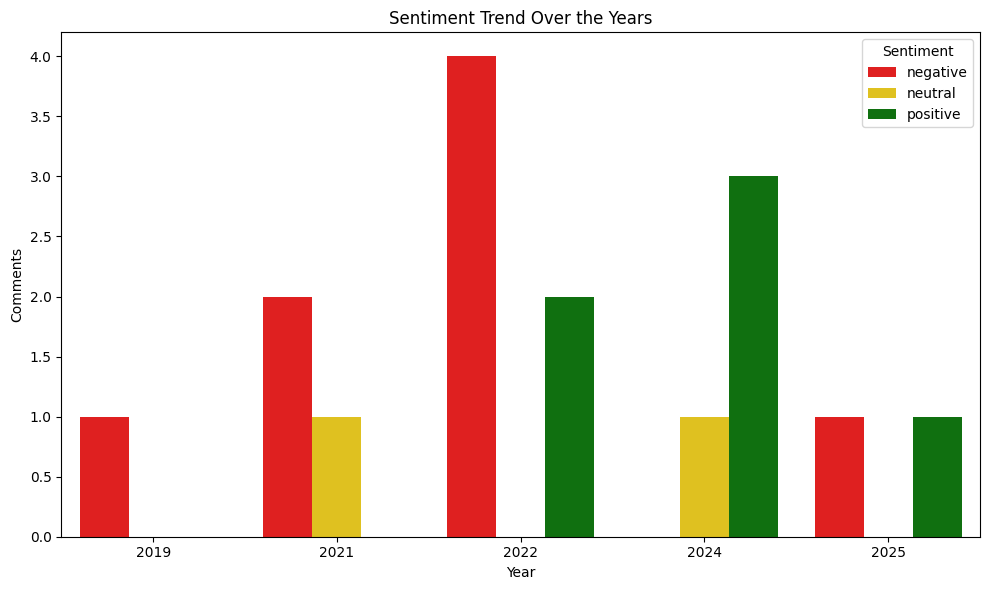

In [6]:
from sentiment_distribution import sentiment_trend_yearly
%matplotlib inline
sentiment_trend_yearly(cleaned_file)

In [7]:
#call the prediction function 

from MLsentimentPrediction import train_sentiment_model
train_sentiment_model(cleaned_file)

Classification Report:
               precision    recall  f1-score   support

    negative       0.50      1.00      0.67         2
     neutral       0.00      0.00      0.00         1
    positive       0.00      0.00      0.00         1

    accuracy                           0.50         4
   macro avg       0.17      0.33      0.22         4
weighted avg       0.25      0.50      0.33         4

Confusion Matrix:
 [[2 0 0]
 [1 0 0]
 [1 0 0]]
Model saved to sentiment_model.pkl
Vectorizer saved to tfidf_vectorizer.pkl


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [8]:
#prediction based on the comments from citizens

from MLsentimentPrediction import predict_sentiment

#Sample texts to test if the model can't derive accurate sentiment expressed by the citizens
sample_texts = [
    "This transport fare system is very fair and efficient.",
    "I hate the new pricing model. It's terrible.",
    "It's okay, not much different than before."
]

#Call the function to conduct the prediction
results = predict_sentiment(sample_texts)
#print results
print(results)

['positive', 'positive', 'negative']


## Insights


For public sentiment distribution, this suggests a generally unfavorable public opinion in this dataset. As there is a slight high number of unfavourable sentiment from the citizens over the new fare system.

Sentiment Trend Over the Years gives us a glimpse into how sentiment has evolved. Negative sentiment peaked in 2022, while positive sentiment saw its highest point in 2024.

Sentiment Distribution per Keyword Category breaks down sentiment by specific topics. 

Keyword Categories Frequency highlights which keyword categories appear most often. "Uncategorized" has the highest frequency, followed by "complaint" and "pricing."


## Next Steps

There was few sample datasets collected from different sources, so with increased datasets, there would be increase in volume of data to deal with represent on graph.
